# Bikeability usage (calculation of the bikeability index)

<p> This is an example on how to calculate the bikeability index based on Hardinghaus et. al. 2020.</p>
<p> First, a GeoPackage is read to extract polygons, and the bikeability index is calculated. From the boundaries, an H3 grid is created, and the bikeability index is calculated for each grid part. Both choropleth maps are visualised, along with additional downloaded data.</p>

### Step 1: import libraries and packages

In [1]:
import os
import sys
from bikeability import bikeability
from bikeability import settings
import geopandas as gpd
import matplotlib.pyplot as plt
from bikeability import grid
from pathlib import Path

In [2]:
project_path = os.path.abspath('../')
sys.path.append(project_path)
plots_folder = os.path.join(project_path, 'plots_output')
if not os.path.exists(plots_folder):
    os.makedirs(plots_folder)
    print(f"Output folder created at: {plots_folder}")
else:
    print(f"Output folder already exists at: {plots_folder}")

Output folder already exists at: C:\Users\lope_m0\PycharmProjects\bikeability-examples\plots_output


### Step 2: load city districts

In [3]:
project_path = os.path.abspath('../')
aggregation_boundaries = gpd.read_file(project_path+f"\\data\\sg_test.gpkg").to_crs(epsg='4326')

<Axes: >

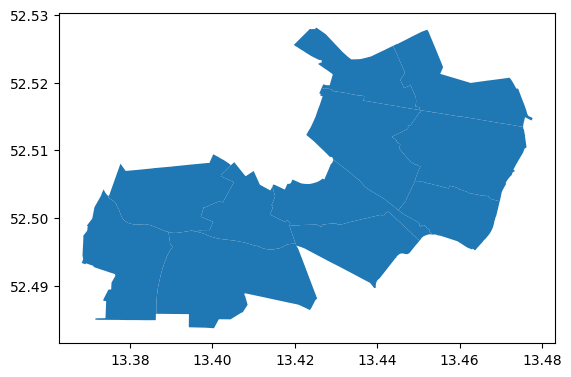

In [4]:
aggregation_boundaries.plot()

### Step 3: setup parameters

In [5]:
id_column = "sg_id"
download = True
store_tmp_files = True
verbose = 1
agg_table = aggregation_boundaries[[id_column, "geometry"]]

### Step 4: calculate bikeability index

In [6]:
bikeability_gdf = bikeability.calc_bikeability(id_column, agg_table, download=download, verbose=verbose, store_tmp_files=store_tmp_files)

Generating bikeability indicator

downloading street network and additional data from osm

downloading green spaces from osm

downloading bike shops from osm

all necessary data has been downloaded

calculating share of cycling infrastructure

calculating share of small streets

calculating green share

calculating node density

calculating shop density calculated

bikeability values have been calculated for 11 geometries



### Step 5: plot a choropleth map of the bikeability index

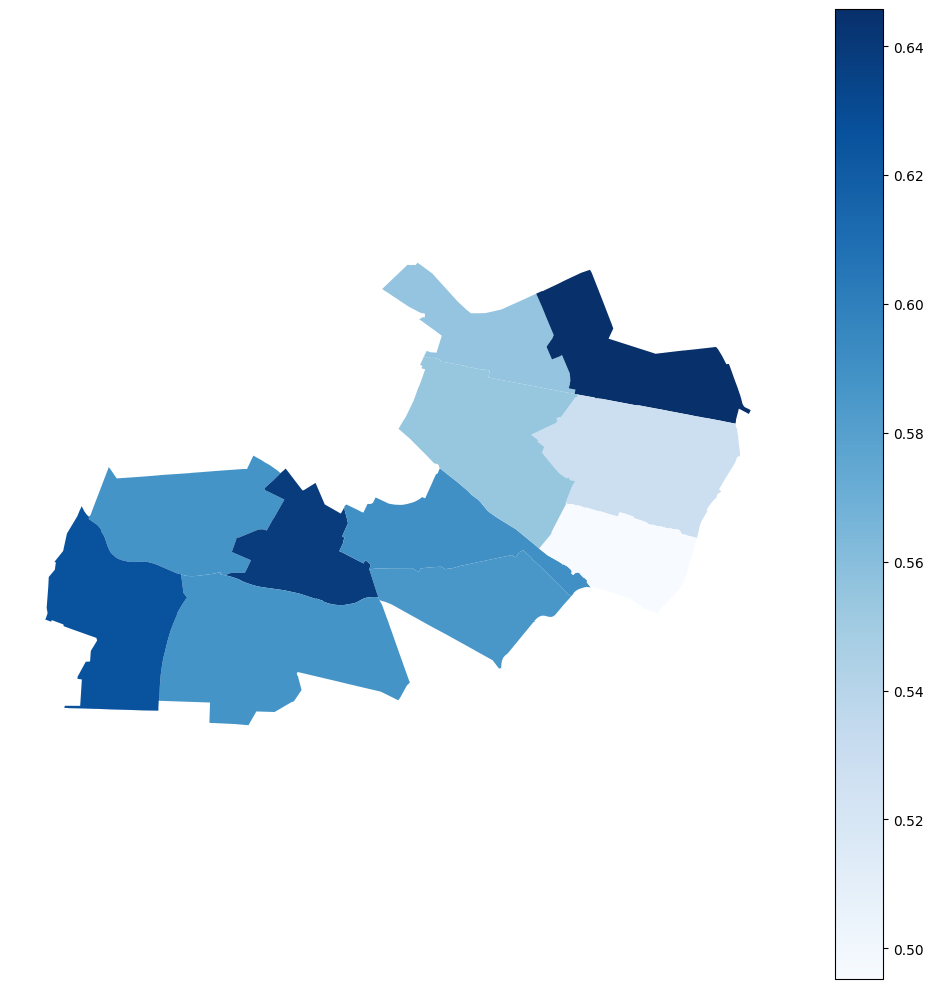

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
bikeability_gdf.plot(column= 'bikeability', ax=ax, cmap='Blues', legend=True)
ax.axis('off')
plt.tight_layout()
plt.show()

### Step 6: create a h3 grid (resolution 9) and calculate bikeability index

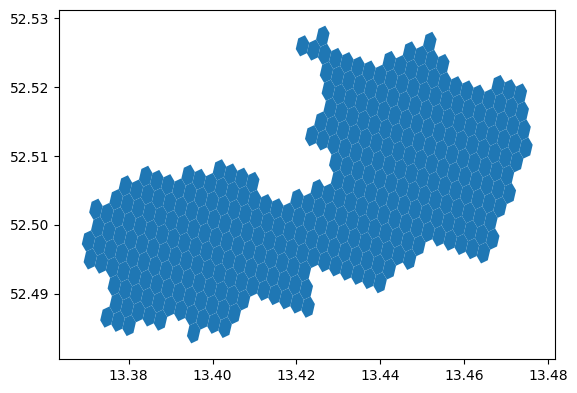

In [8]:
id_column = 'h3_id'

h3_test = grid.create_h3_grid(aggregation_boundaries, res=9)
h3_test.plot()
h3_test = h3_test.reset_index(names=id_column)
plt.show()


In [9]:
download=False
bikeability_gdf = bikeability.calc_bikeability(id_column, h3_test, download=download, verbose=verbose)

Generating bikeability indicator

loading street network and additional data from disk

all necessary data has been loaded

calculating share of cycling infrastructure

calculating share of small streets

calculating green share

calculating node density

calculating shop density calculated

bikeability values have been calculated for 370 geometries



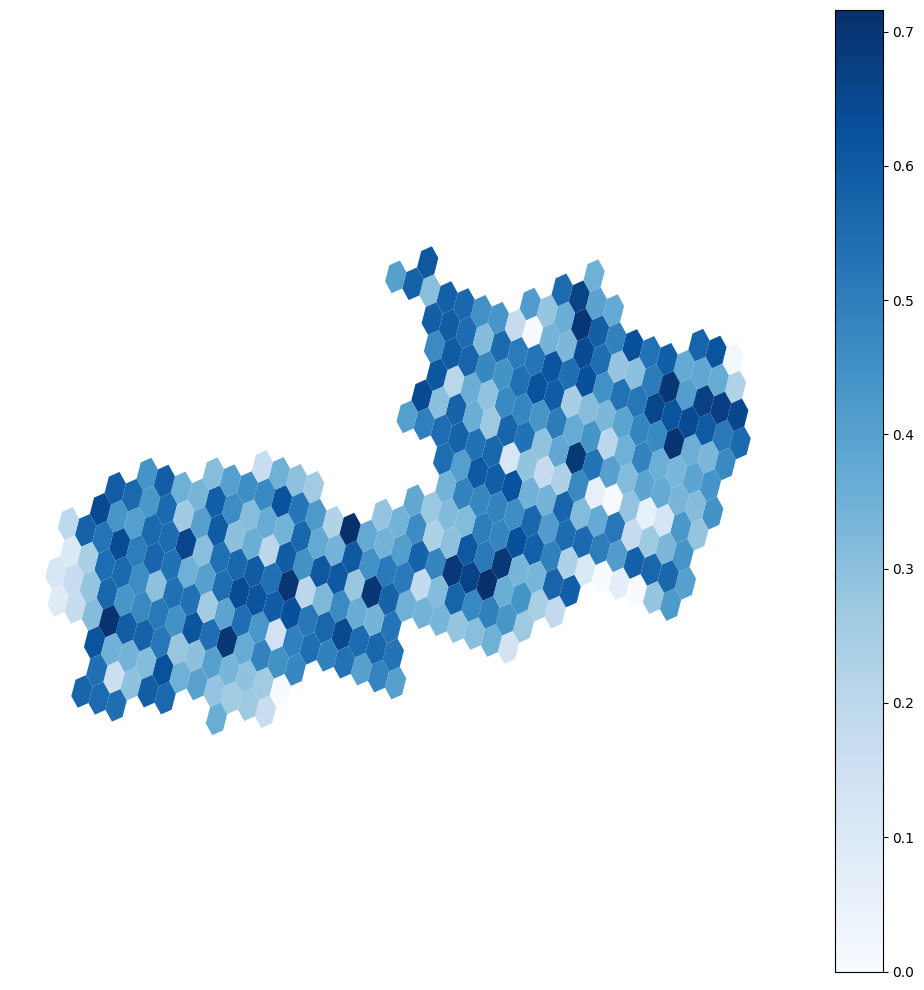

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
bikeability_gdf.plot(column= 'bikeability', ax=ax, cmap='Blues', legend=True)
ax.axis('off')
plt.tight_layout()
plt.show()

### Step 7: Visualisation of further geodata

In [11]:
shops = gpd.read_file(f"{settings.tmp_directory}/shops.gpkg")
urban_green = gpd.read_file(f"{settings.tmp_directory}/green_spaces.gpkg")
network = gpd.read_file(f"{settings.tmp_directory}/network.gpkg")
nodes = gpd.read_file(f"{settings.tmp_directory}/nodes.gpkg")
cycling_network = gpd.read_file(f"{settings.tmp_directory}/cycling_network.gpkg")
crossroads = gpd.read_file(f"{settings.tmp_directory}/crossroads.gpkg")

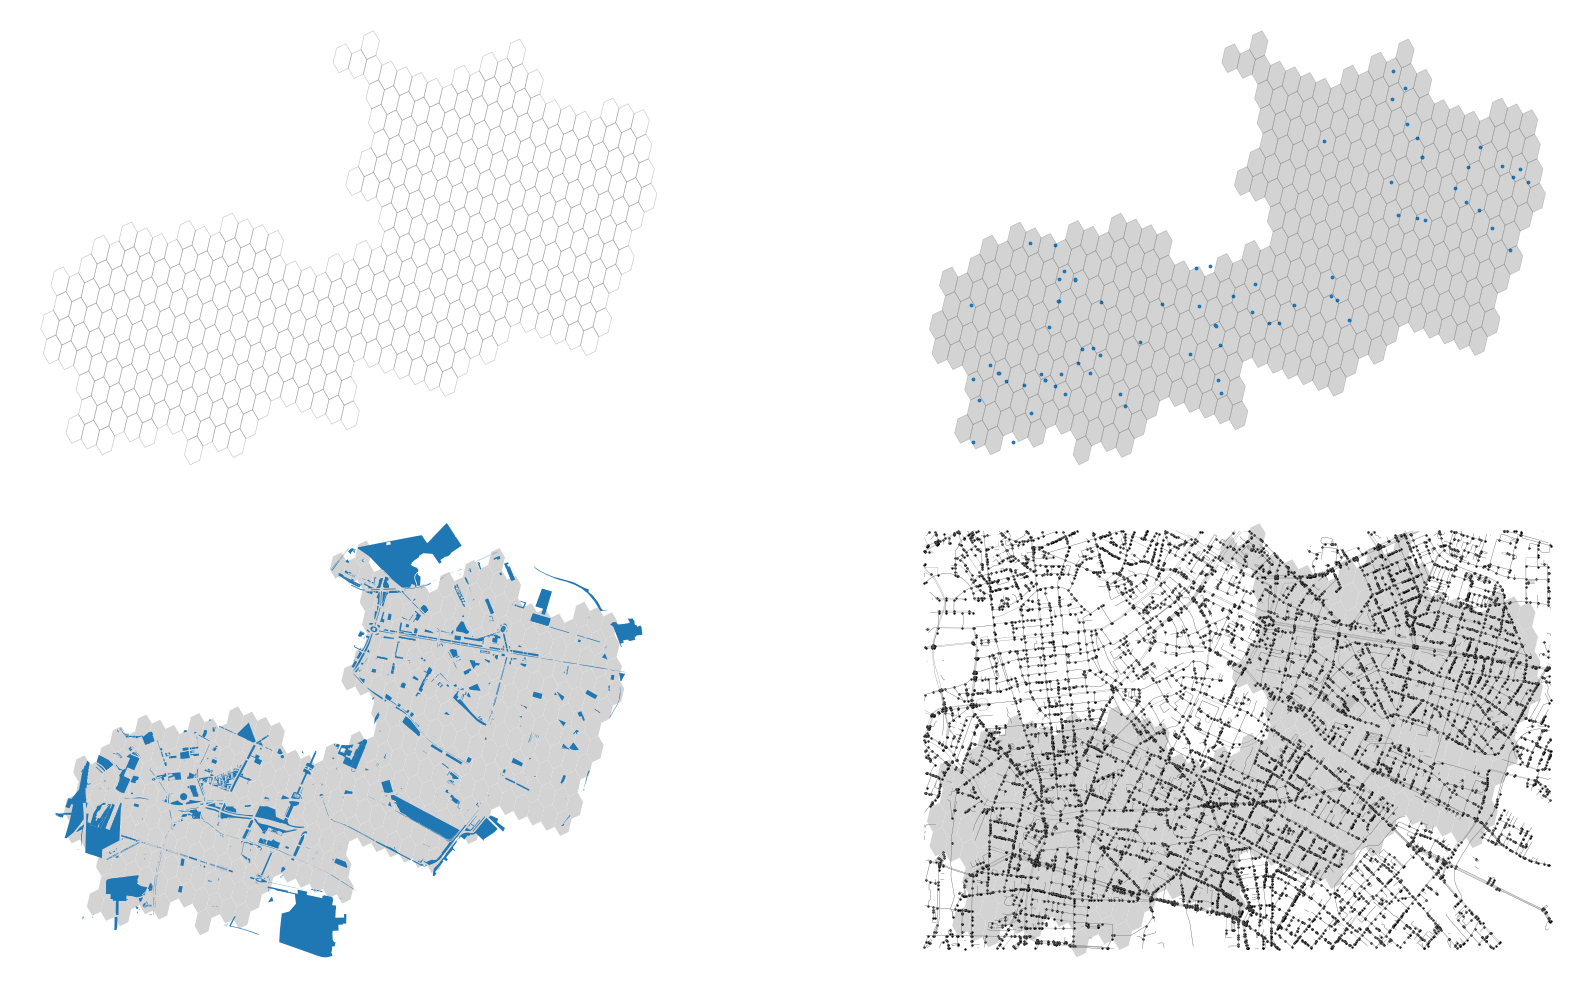

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
#fig.suptitle('')
h3_test.boundary.plot(ax=axs[0,0], linewidth=0.5,color="black", alpha=0.2)
h3_test.plot(ax=axs[0, 1], color="lightgrey")
h3_test.boundary.plot(ax=axs[0, 1], linewidth=0.4,color="black", alpha=0.2)
shops.plot(ax=axs[0,1], markersize=3)
h3_test.plot(ax=axs[1,0], color="lightgrey")
urban_green.plot(ax=axs[1,0])
h3_test.plot(ax=axs[1,1], color="lightgrey")

network.plot(color="grey", linewidth=0.2, ax=axs[1,1])
nodes.plot(color="black", markersize=0.5, ax=axs[1,1])
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
plt.tight_layout()

plt.savefig(plots_folder+"bikeability_data_example.png")

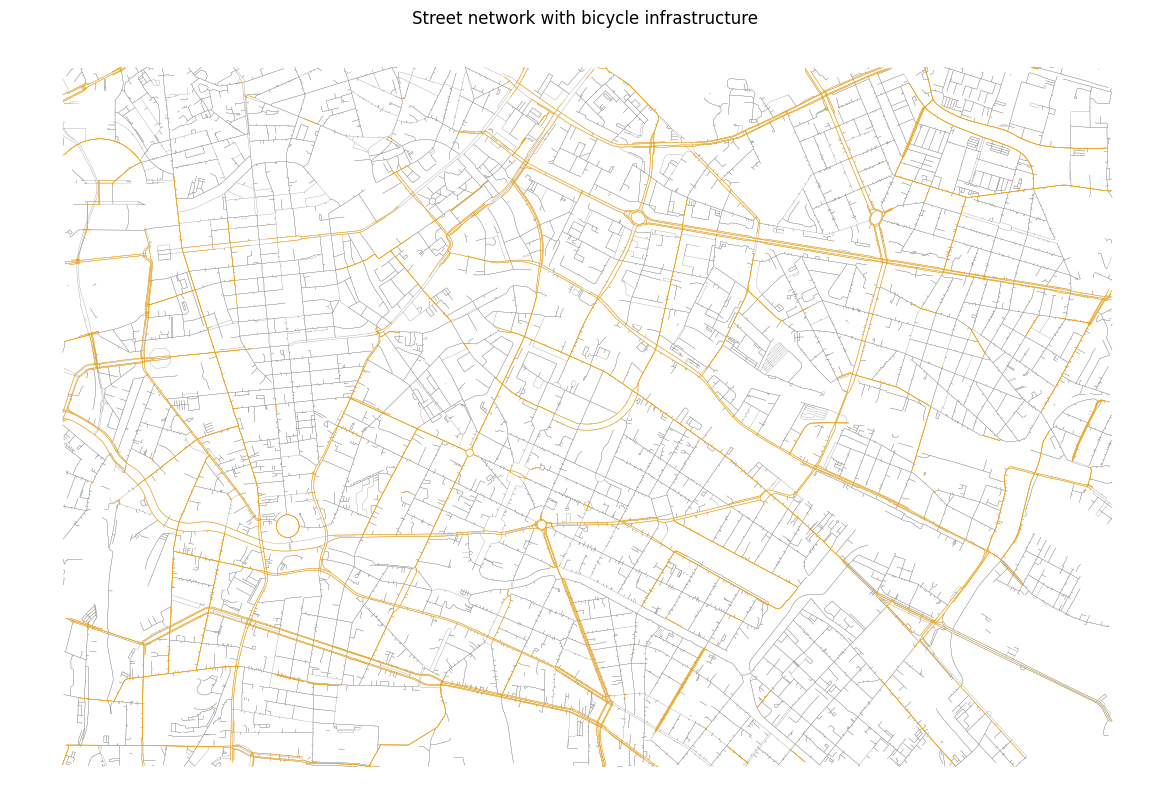

In [13]:
ax = network.plot(color="grey", linewidth=0.2,figsize=(20,10))
cycling_network.to_crs(4326).plot(color="orange", linewidth=0.4, ax=ax)

ax.axis('off')
ax.title.set_text("Street network with bicycle infrastructure ")

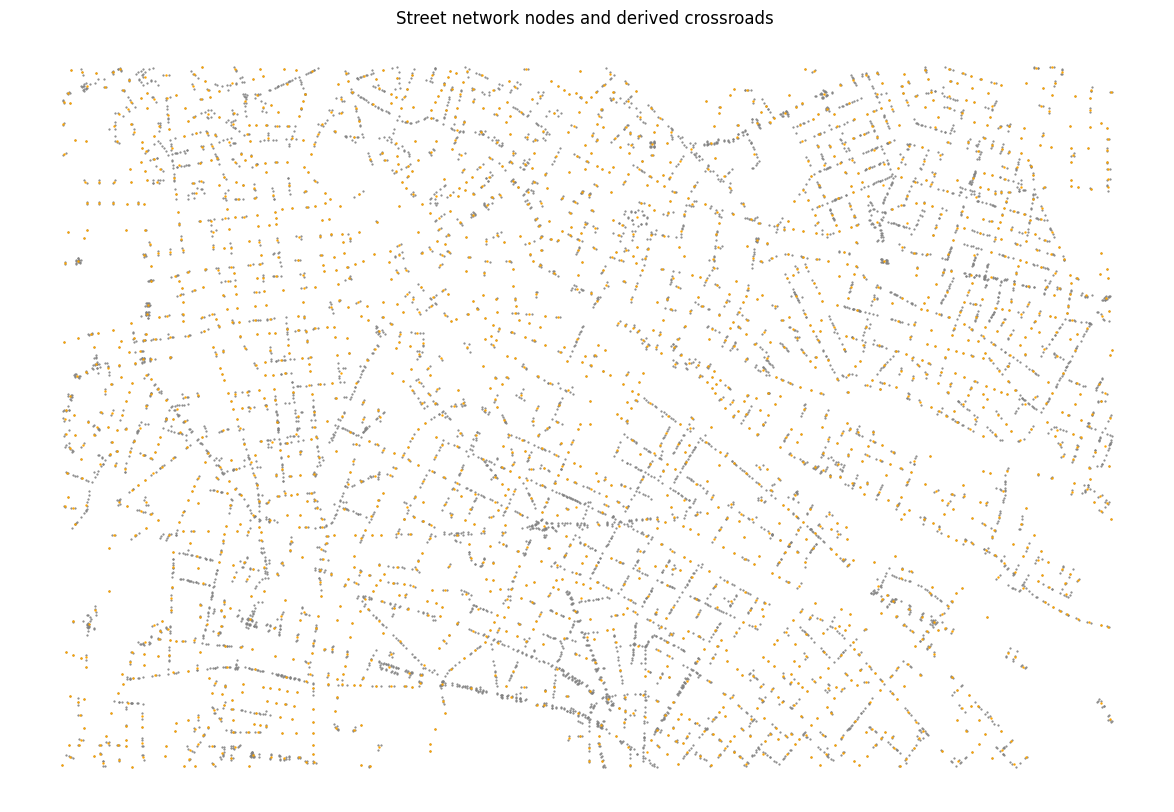

In [14]:
ax = nodes.plot(color="grey", markersize=0.3, figsize=(20,10))
crossroads.to_crs(4326).plot(color="orange", markersize=0.5, ax=ax)

ax.axis('off')
ax.title.set_text("Street network nodes and derived crossroads ")

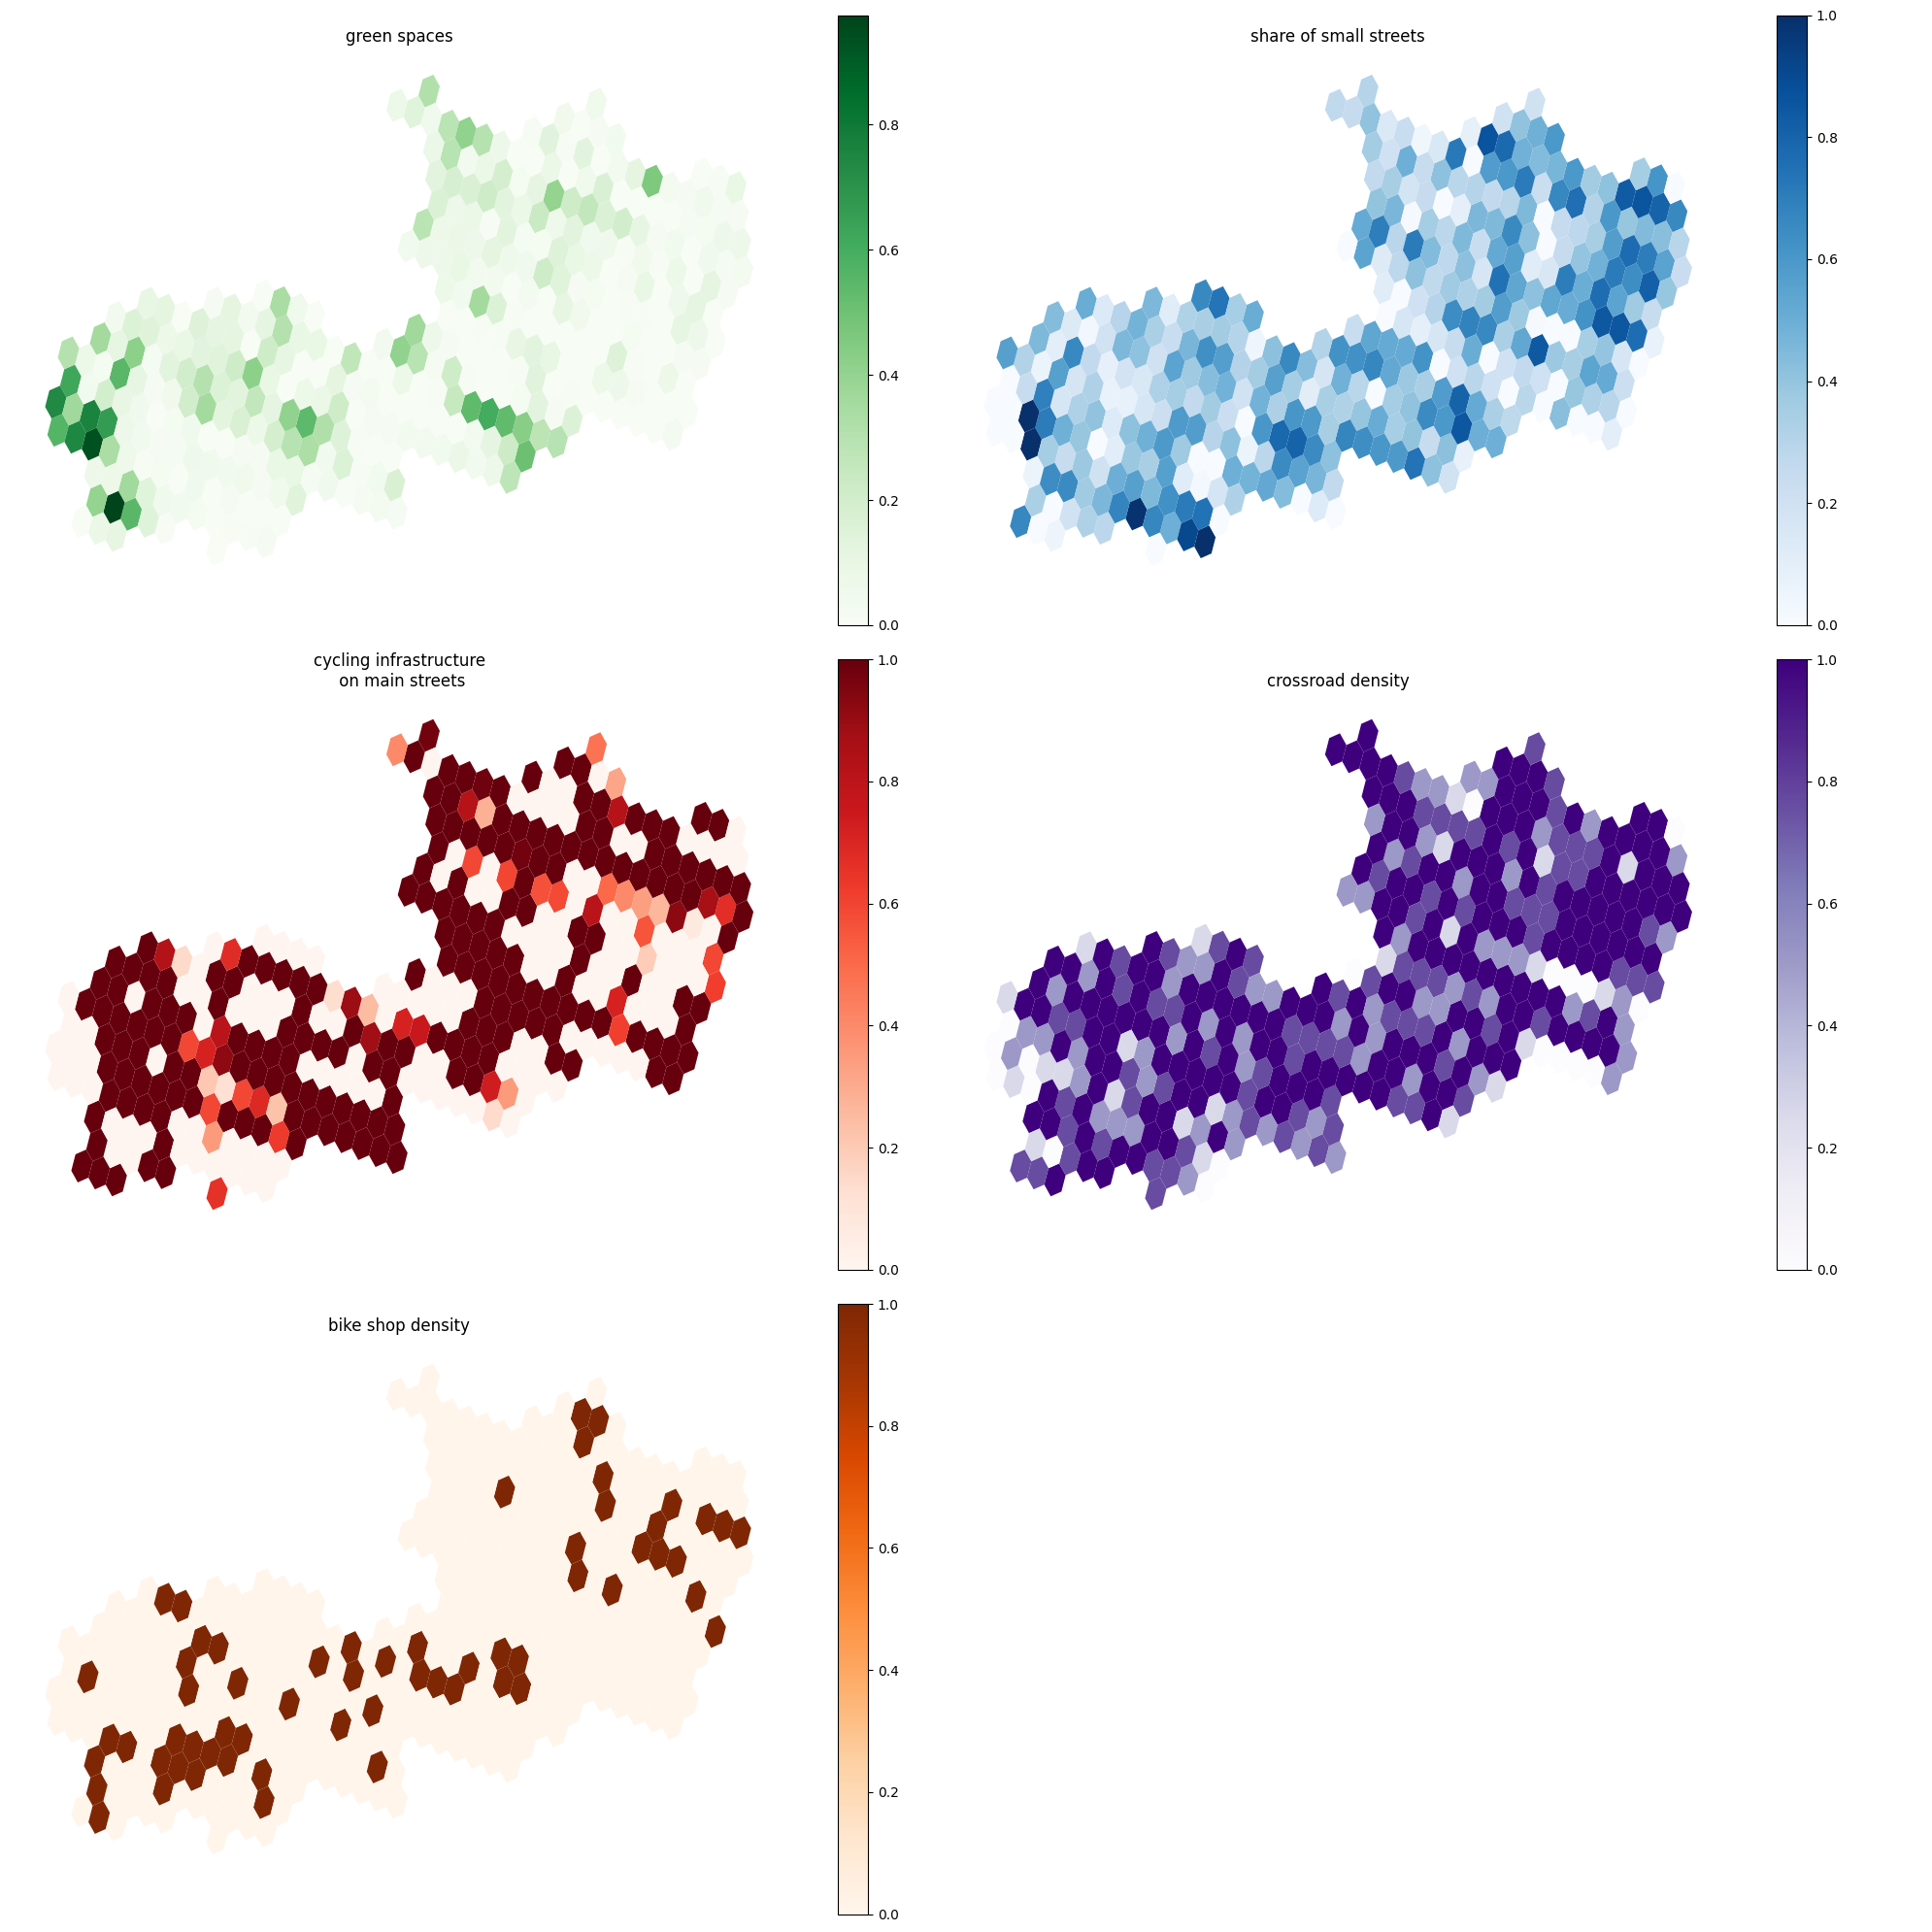

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))

bikeability_gdf.plot(ax=axs[0,0],  column= "green_spaces_share", cmap="Greens", legend=True)
bikeability_gdf.plot(ax=axs[0,1],  column= "small_streets_share", cmap="Blues", legend=True)
bikeability_gdf.plot(ax=axs[1,0],  column= "cycling_infra_share", cmap="Reds", legend=True)
bikeability_gdf.plot(ax=axs[1,1],  column= "node_dens_scaled", cmap="Purples", legend=True)
bikeability_gdf.plot(ax=axs[2,0],  column= "shop_dens_scaled", cmap="Oranges", legend=True)

axs[0,0].axis('off')
axs[0,0].title.set_text("green spaces")
axs[0,1].axis('off')
axs[0,1].title.set_text("share of small streets")
axs[1,0].axis('off')
axs[1,0].title.set_text("cycling infrastructure\n on main streets")
axs[1,1].axis('off')
axs[1,1].title.set_text("crossroad density")
axs[2,0].axis('off')
axs[2,0].title.set_text("bike shop density")
axs[2,1].axis('off')
plt.tight_layout()

plt.savefig(plots_folder+"bikeability_data_example_2.png")

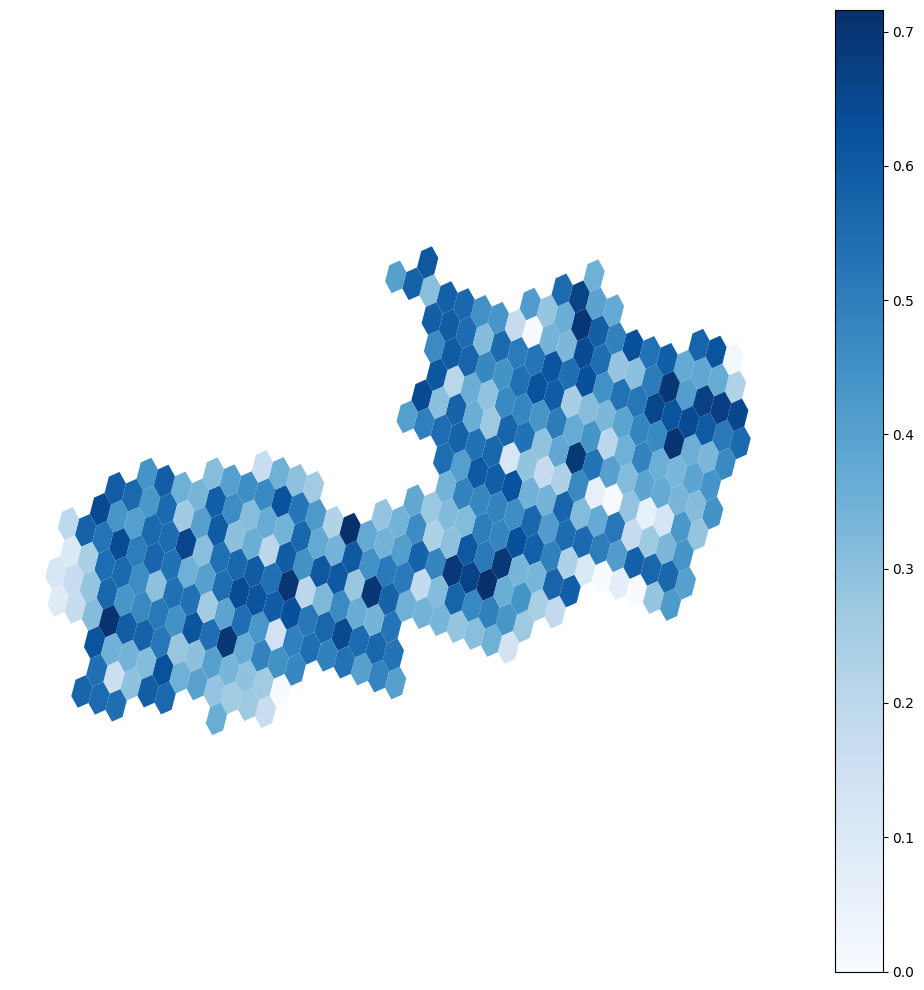

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
bikeability_gdf.plot(column= 'bikeability', ax=ax, cmap='Blues', legend=True)
ax.axis('off')
plt.tight_layout()
plt.show()